<a href="https://colab.research.google.com/github/pipeton8/6.439-stats-comp-applications/blob/main/Assignments/5%20-%20Environmental/6.439%20-%20Problem%20Set%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 5 - Statistics, Computation and Applications

(c) Felipe del Canto, November 2021

(c) Data from [MSEAS](http://mseas.mit.edu) at MIT.
***
***

# Part 0 (Execute first!)

In [1]:
from IPython.display import clear_output

# Download files
!wget https://github.com/pipeton8/6.439-stats-comp-applications/raw/main/Assignments/databases/PS5_data.zip
!wget https://github.com/pipeton8/6.439-stats-comp-applications/raw/main/Assignments/databases/PS5_data.z01
!wget https://github.com/pipeton8/6.439-stats-comp-applications/raw/main/Assignments/databases/PS5_data.z02
!wget https://github.com/pipeton8/6.439-stats-comp-applications/raw/main/Assignments/databases/PS5_data.z03
!wget https://github.com/pipeton8/6.439-stats-comp-applications/raw/main/Assignments/databases/PS5_data.z04
!wget https://github.com/pipeton8/6.439-stats-comp-applications/raw/main/Assignments/databases/PS5_data.z05
!wget https://github.com/pipeton8/6.439-stats-comp-applications/raw/main/Assignments/databases/PS5_data.z06
!wget https://github.com/pipeton8/6.439-stats-comp-applications/raw/main/Assignments/databases/PS5_data.z07

# Unzip
!zip -F PS5_data.zip -O PS5_data_combined.zip
!unzip -o PS5_data_combined.zip -d PS5_data
!rm *.z* -r __MACOSX PS5_data/__MACOSX

# Clear output
clear_output()

# Import packages
import numpy as np
pd.options.display.float_format = '{:.2f}'.format

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

# Data path
data_path = "PS5_data/"

## Functions

In [18]:
def load(filename, file_path = data_path):
  return np.genfromtxt(file_path+filename, delimiter=",")

# Problem 5.1: Flows and corelations

## (a) and (b)

The first step is to compute the average flow over time. In all matrices, the index (0,0) corresponds to the **bottom left** of each plot. Additionally, all values of each matrix are multiplied by $\frac{25}{0.9}$ for them to be in cm/second (cmps) units.

In order to gain a better sense of the strength of the currents, two different average speeds are computed. First, the average of all speed values over time. In other words, the speed is computed *before* averaging. Second, the speed of the average flow. This is, compute the speed *after* averaging the flow vectors.

In [266]:
# Parameters
max_T = 100
max_x = 555
max_y = 504

# Initialize average values
u_average = np.zeros((max_y, max_x))
v_average = np.zeros((max_y, max_x))

# Average speed
speed_average = np.zeros((max_y, max_x))

for t in tqdm(range(1, max_T+1)):
  # Load flow data for time t
  new_u, new_v = load(f'{t}u.csv'), load(f'{t}v.csv')

  # Convert to cmps
  new_u *= 25/0.9
  new_v *= 25/0.9

  # Update averages
  u_average += (1/max_T) * new_u
  v_average += (1/max_T) * new_v

  # Update speeds
  speed_average += (1/max_T) * np.sqrt(new_u**2 + new_v**2)

# Compute speeds
speed_of_average = np.sqrt(u_average**2 + v_average**2)

# Load mask for land plotting
mask = load("mask.csv")

  0%|          | 0/100 [00:00<?, ?it/s]

The image below shows some of the vectors than comprise the 2-D vector field of currents. The speed of the average flow (the second one in the paragraph above) is represented by the color of the arrows, according to the color bar at the right. 

The fastest flow is present running from east to west on the southern end of the Archipielago (around 300 km east of the initial coordinate). There is also a strong current around the islands to the southwest (around 100 km north of the initial coordinate) Other important flows run on the east, mostly going south. There are lesser important but prevalent currents running almost in circular patterns at the center and the west and at the center-north, on the east.

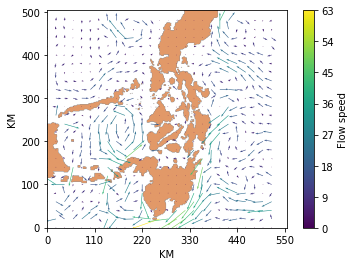

In [277]:
# Arrow positions
arrows_every = 20
x = [arrows_every * k for k in range(max_x//arrows_every)]
y = [arrows_every * k for k in range(max_y//arrows_every)]

# Initialize figure
fig, ax = plt.subplots()

# Obtain land coloration
land = np.zeros((max_y,max_x,4))
land[mask == 0] = [0.89, 0.60, 0.41, 1.]	

# Draw quiver
plt.quiver(x,y,u_average[y][:,x],v_average[y][:,x], speed_of_average[y][:,x])

# Draw map
plt.imshow(np.flip(land,0))
plt.gca().invert_yaxis()

# Show and edit colorbar
cbar = plt.colorbar(ax=ax, ticks=[9*k for k in range(8)])
cbar.set_label("Flow speed")
plt.clim(0,63)

# Set axis ticks and labels
ax.set_xlabel("km")
ax.set_xticks([110*k for k in range(6)])

ax.set_ylabel("km")


# Show image
plt.show()

The figure below shows the average speed (the first one in the paragraph that introduced this subsection). The patters shown in the previous picture still hold. The most strong currents are present n the southern part of the Archipielago, and in the islands at the south west (around 100 km to the north of the initial coordinates)

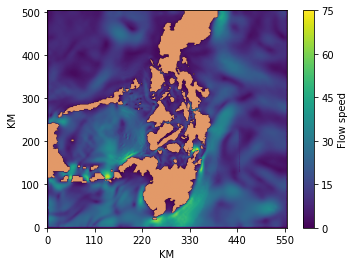

In [279]:
# Initialize figure
fig, ax = plt.subplots()

# Obtain land coloration
land = np.zeros((max_y,max_x,4))
land[mask == 0] = [0.89, 0.60, 0.41, 1.]

# Draw matrix
plt.imshow(speed_average, cmap='viridis')

# Draw map on top of matrix
plt.imshow(np.flip(land,0))
plt.gca().invert_yaxis()

# Show and edit colorbar
cbar = plt.colorbar(ax=ax, ticks=[15*k for k in range(6)])
cbar.set_label("Flow speed")
plt.clim(0,75)

# Set axis ticks and labels
ax.set_xlabel("km")
ax.set_xticks([110*k for k in range(6)])

ax.set_ylabel("km")

# Show image
plt.show()

## (c)

# Problem 5.2: Predicting trajectories.